In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pqr_agrs_100_30k = pd.read_csv('../cass_exp/pqr_100_each/pqr_agrs_100_30k_merge.csv', header = 2)

In [3]:
pqr_agrs_100_30k

,wall_time,step,run/total_reward,run/length,loss/value_loss,loss/policy_loss,loss/agent_loss,loss/entropy,total_loss
0,1.597846e+09,0,1.0,4.0,1.635624e-01,1.607455,1.771018,1.730622,1.771018
1,1.597846e+09,4,1.0,5.0,4.242877e-03,1.532532,1.536775,1.661310,1.536775
2,1.597846e+09,9,1.0,6.0,1.466499e-08,1.477730,1.477730,1.463708,1.477730
3,1.597846e+09,15,1.0,6.0,1.209064e-10,1.466314,1.466314,1.440471,1.466314
4,1.597846e+09,21,1.0,8.0,1.043098e-09,1.386668,1.386668,1.469950,1.386668
...,...,...,...,...,...,...,...,...,...
182453,1.597833e+09,29825,1.0,37.0,3.887827e-09,0.935341,0.935341,0.784651,0.935341
182454,1.597833e+09,29862,1.0,23.0,1.000000e-02,0.806829,0.816829,0.847733,0.816829
182455,1.597833e+09,29885,1.0,28.0,2.000000e-02,0.979510,0.999510,0.889129,0.999510
182456,1.597833e+09,29913,1.0,24.0,1.719513e-14,0.752453,0.752453,0.760864,0.752453


In [4]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.920000,14.510000,0.000000,0.000000
1,2.0,0.960040,8.749245,0.003200,66.240050
2,3.0,0.973387,6.954246,0.002131,42.724032
3,4.0,0.980060,6.798552,0.001597,28.550772
4,5.0,0.984064,6.867689,0.001276,21.415432
...,...,...,...,...,...
29886,29954.0,0.987597,17.788134,0.004221,21.015798
29887,29961.0,0.987622,17.768577,0.004213,21.165041
29888,29962.0,0.987647,17.762047,0.004204,21.144078
29889,29969.0,0.987671,17.790494,0.004196,21.506461


In [5]:
pqr_no_agrs_100_30k = pd.read_csv('../cass_exp/pqr_100_each/pqr_no_agrs_100_30k_merge.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.940000,14.960000,0.000000,0.000000
1,2.0,0.970030,8.473520,0.001800,83.980800
2,3.0,0.980040,6.879163,0.001199,49.551500
3,4.0,0.985045,6.324379,0.000898,34.227521
4,5.0,0.988048,6.627378,0.000718,26.101709
...,...,...,...,...,...
29865,29965.0,0.988546,18.236378,0.003620,20.497177
29866,29970.0,0.988568,18.211929,0.003613,20.755084
29867,29980.0,0.988591,18.205512,0.003606,20.734207
29868,29990.0,0.988614,18.237069,0.003599,21.190715


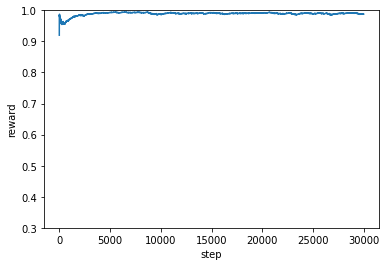

In [6]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

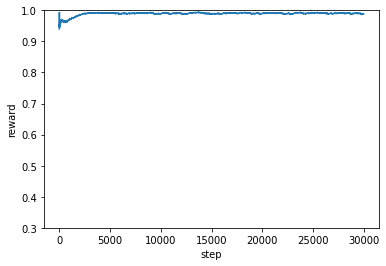

In [7]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

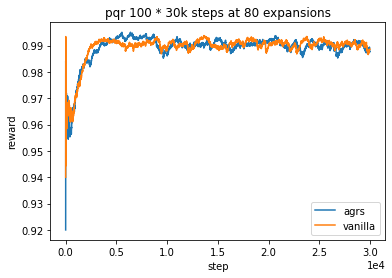

In [8]:
fig, axs = plt.subplots(ncols=1)
plt.title('pqr 100 * 30k steps at 80 expansions')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axs.legend(['agrs','vanilla'], loc=4)

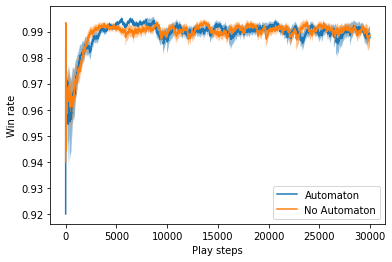

In [9]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)

axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5)
axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton', 'No Automaton'], loc=4)